# Image Reconstruction Problem

**12210357 徐婧珺**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import pca
import linear_autoencoder as lae
import soft_kmeans as skm
import importlib

importlib.reload(pca)
importlib.reload(lae)
importlib.reload(skm)

def PCA_img_reconstruction(img, feature_num):
    # 送进来的就是直接通过mping.imread读取的三维数组
    # 处理图片数据使得它成为两维的
    img_2d = img.reshape(img.shape[0], -1)
    # 对图片数据进行标准化，使得恢复出来的图片质量更高
    scaler = StandardScaler()
    img_2d_scaled = scaler.fit_transform(img_2d)
    # 构建PCA模型
    PCAmodel = pca.PCA(feature_num)
    # 获取主要的feature_num维度的数据
    PCAmodel.fit(img_2d_scaled)
    img_pca = PCAmodel.transform(img_2d_scaled)
    # 使用降维的数据重建图像
    img_restored_scaled = PCAmodel.inverse_transform(img_pca)
    img_restored_scaled = np.real(img_restored_scaled)
    # 反向标准化
    img_restored = scaler.inverse_transform(img_restored_scaled)
    # 确保数据类型正确
    if img_restored.dtype.kind == 'f':  # 检查数据是否为浮点类型
        # 如果是浮点类型，归一化到 [0.0, 1.0]
        img_restored = (img_restored - img_restored.min()) / (img_restored.max() - img_restored.min())
    elif img_restored.dtype.kind == 'i':  # 检查数据是否为整数类型
        # 如果是整数类型，确保值在 [0, 255]
        img_restored = np.clip(img_restored, 0, 255)
    # 将二维数组转换回原始图像的形状
    img_restored = img_restored.reshape(img.shape)
    return img_restored

def LinearAutoEncoder_img_reconstruction(img, feature_num, epoch_num, learning_rate, gray = False, tol = None):
    # 送进来的就是直接通过mping.imread读取的三维数组
    # 处理图片数据使得它成为两维的
    img_2d = img.reshape(img.shape[0], -1)
    # 对图片数据进行标准化，使得恢复出来的图片质量更高
    scaler = StandardScaler()
    img_2d_scaled = scaler.fit_transform(img_2d)
    # 构建linear_encoder模型
    LAEmodel = lae.LinearAutoEncoder(img_2d_scaled.shape[1], feature_num)
    # 获取主要的feature_num维度的数据
    LAEmodel.fit(img_2d_scaled, epoch_num, learning_rate, tol)
    # 看看训练的效果qwq
    # LAEmodel.plot_loss()
    img_lae = LAEmodel.transform(img_2d_scaled)
    # 使用降维的数据重建图像
    img_restored_scaled = LAEmodel.predict(img_lae)
    img_restored_scaled = np.real(img_restored_scaled)
    # 反向标准化
    img_restored = scaler.inverse_transform(img_restored_scaled)
    # 确保数据类型正确
    if img_restored.dtype.kind == 'f':  # 检查数据是否为浮点类型
        # 如果是浮点类型，归一化到 [0.0, 1.0]
        img_restored = (img_restored - img_restored.min()) / (img_restored.max() - img_restored.min())
    elif img_restored.dtype.kind == 'i':  # 检查数据是否为整数类型
        # 如果是整数类型，确保值在 [0, 255]
        img_restored = np.clip(img_restored, 0, 255)
    # 将二维数组转换回原始图像的形状
    img_restored = img_restored.reshape(img.shape)
    # 灰度图处理
    if gray:
        weights = np.array([0.2989, 0.5870, 0.1140])
        img_restored = np.dot(img_restored[...,:3], weights)
    return img_restored

def SoftKmeans_img_reconstruction(img, feature_num, epoch_num, beta, init_type, tol, random_state, gray):
    # 送进来的就是直接通过mping.imread读取的三维数组
    # 处理图片数据使得它成为两维的
    img_2d = img.reshape(img.shape[0], -1)
    # 构建Soft_kmeans模型
    SKMmodel = skm.SoftKMeans(feature_num, epoch_num, beta, tol, random_state)
    # 获取主要的feature_num维度的数据
    img_2d_T = img_2d.T
    SKMmodel.fit(img_2d_T, init_type)
    assignments = SKMmodel.predict(img_2d_T)
    centroids = SKMmodel.return_centroids()
    img_restored_T = centroids[assignments - 1]
    img_restored = img_restored_T.T
    # 确保数据类型正确
    if img_restored.dtype.kind == 'f':  # 检查数据是否为浮点类型
        # 如果是浮点类型，归一化到 [0.0, 1.0]
        img_restored = (img_restored - img_restored.min()) / (img_restored.max() - img_restored.min())
    elif img_restored.dtype.kind == 'i':  # 检查数据是否为整数类型
        # 如果是整数类型，确保值在 [0, 255]
        img_restored = np.clip(img_restored, 0, 255)
    # 将二维数组转换回原始图像的形状
    img_restored = img_restored.reshape(img.shape)
    # 灰度图处理
    if gray:
        weights = np.array([0.2989, 0.5870, 0.1140])
        img_restored = np.dot(img_restored[...,:3], weights)
    return img_restored

## Image reconstruction with LinearAutoEncoder

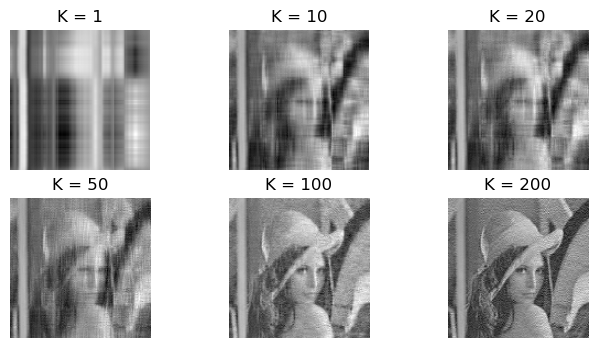

In [5]:
img_ch1 = mpimg.imread('input_image_ch1_128.jpg')

img_ch1_restored_1 = LinearAutoEncoder_img_reconstruction(img_ch1, 1, epoch_num= 80000, learning_rate = 0.0001, gray = True, tol = None)
img_ch1_restored_10 = LinearAutoEncoder_img_reconstruction(img_ch1, 10, epoch_num= 80000, learning_rate = 0.00008, gray = True, tol = None)
img_ch1_restored_20 = LinearAutoEncoder_img_reconstruction(img_ch1, 20, epoch_num= 100000, learning_rate = 0.000065, gray = True, tol = None)
img_ch1_restored_50 = LinearAutoEncoder_img_reconstruction(img_ch1, 50, epoch_num= 100000, learning_rate = 0.00005, gray = True, tol = None)
img_ch1_restored_100 = LinearAutoEncoder_img_reconstruction(img_ch1, 100, epoch_num= 100000, learning_rate = 0.000045, gray = True, tol = None)
img_ch1_restored_200 = LinearAutoEncoder_img_reconstruction(img_ch1, 200, epoch_num= 100000, learning_rate = 0.00003, gray = True, tol = None) # 0.00003 0.0022

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch1_restored_1, cmap='gray')
plt.title('K = 1')
plt.axis('off')


plt.subplot(2, 3, 2)
plt.imshow(img_ch1_restored_10, cmap='gray')
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch1_restored_20, cmap='gray')
plt.title('K = 20')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch1_restored_50, cmap='gray')
plt.title('K = 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch1_restored_100, cmap='gray')
plt.title('K = 100')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch1_restored_200, cmap='gray')
plt.title('K = 200')
plt.axis('off')

plt.show()

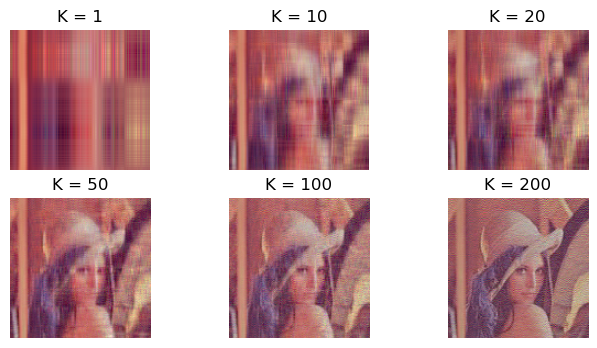

In [5]:
img_ch3 = mpimg.imread('input_image_ch3_128.jpg')

img_ch3_restored_1 = LinearAutoEncoder_img_reconstruction(img_ch3, 1, epoch_num= 100000, learning_rate = 0.00005)
img_ch3_restored_10 = LinearAutoEncoder_img_reconstruction(img_ch3, 10, epoch_num= 100000, learning_rate = 0.00008)
img_ch3_restored_20 = LinearAutoEncoder_img_reconstruction(img_ch3, 20, epoch_num= 100000, learning_rate = 0.00007)
img_ch3_restored_50 = LinearAutoEncoder_img_reconstruction(img_ch3, 50, epoch_num= 100000, learning_rate = 0.00006)
img_ch3_restored_100 = LinearAutoEncoder_img_reconstruction(img_ch3, 100, epoch_num= 100000, learning_rate = 0.00004)
img_ch3_restored_200 = LinearAutoEncoder_img_reconstruction(img_ch3, 200, epoch_num= 100000, learning_rate = 0.00003)

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch3_restored_1, cmap='gray')
plt.title('K = 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_ch3_restored_10, cmap='gray')
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch3_restored_20, cmap='gray')
plt.title('K = 20')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch3_restored_50, cmap='gray')
plt.title('K = 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch3_restored_100, cmap='gray')
plt.title('K = 100')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch3_restored_200, cmap='gray')
plt.title('K = 200')
plt.axis('off')

plt.show()

## Image reconstruction with PCA

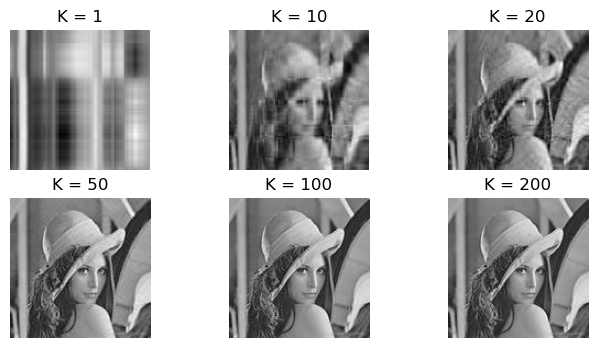

In [7]:
# 读取灰度图片
img_ch1 = mpimg.imread('input_image_ch1_128.jpg')

img_ch1_restored_1 = PCA_img_reconstruction(img_ch1, 1)
img_ch1_restored_10 = PCA_img_reconstruction(img_ch1, 10)
img_ch1_restored_20 = PCA_img_reconstruction(img_ch1, 20)
img_ch1_restored_50 = PCA_img_reconstruction(img_ch1, 50)
img_ch1_restored_100 = PCA_img_reconstruction(img_ch1, 100)
img_ch1_restored_200 = PCA_img_reconstruction(img_ch1, 200)

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch1_restored_1, cmap='gray')
plt.title('K = 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_ch1_restored_10, cmap='gray')
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch1_restored_20, cmap='gray')
plt.title('K = 20')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch1_restored_50, cmap='gray')
plt.title('K = 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch1_restored_100, cmap='gray')
plt.title('K = 100')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch1_restored_200, cmap='gray')
plt.title('K = 200')
plt.axis('off')

plt.show()

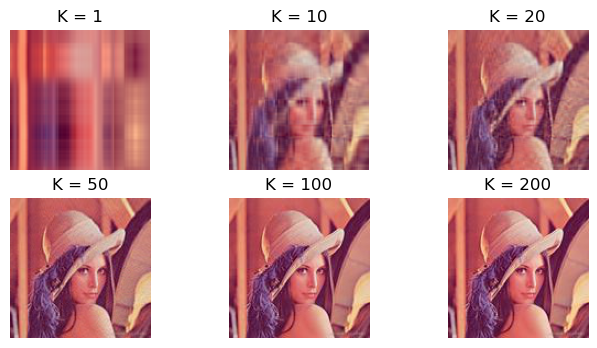

In [8]:
# 读取rgb图像
img_ch3 = mpimg.imread('input_image_ch3_128.jpg')

img_ch3_restored_1 = PCA_img_reconstruction(img_ch3, 1)
img_ch3_restored_10 = PCA_img_reconstruction(img_ch3, 10)
img_ch3_restored_20 = PCA_img_reconstruction(img_ch3, 20)
img_ch3_restored_50 = PCA_img_reconstruction(img_ch3, 50)
img_ch3_restored_100 = PCA_img_reconstruction(img_ch3, 100)
img_ch3_restored_200 = PCA_img_reconstruction(img_ch3, 200)

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch3_restored_1)
plt.title('K = 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_ch3_restored_10)
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch3_restored_20)
plt.title('K = 20')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch3_restored_50)
plt.title('K = 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch3_restored_100)
plt.title('K = 100')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch3_restored_200)
plt.title('K = 200')
plt.axis('off')

plt.show()

## Image Reconstruction with Soft Kmeans

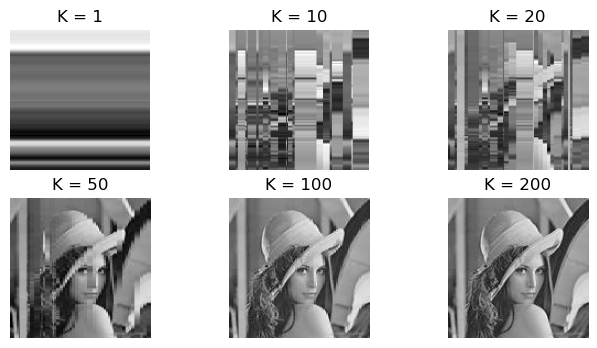

In [9]:
img_ch1 = mpimg.imread('input_image_ch1_128.jpg')

img_ch1_restored_1 = SoftKmeans_img_reconstruction(img_ch1, 1, epoch_num= 10000, beta = 0.6, init_type = 2, tol = 1e-20, random_state = 100, gray = True)
img_ch1_restored_10 = SoftKmeans_img_reconstruction(img_ch1, 10, epoch_num= 10000, beta = 0.8, init_type = 2, tol = 1e-20, random_state = 100, gray = True)
img_ch1_restored_20 = SoftKmeans_img_reconstruction(img_ch1, 20, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = True)
img_ch1_restored_50 = SoftKmeans_img_reconstruction(img_ch1, 50, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = True)
img_ch1_restored_100 = SoftKmeans_img_reconstruction(img_ch1, 100, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = True)
img_ch1_restored_200 = SoftKmeans_img_reconstruction(img_ch1, 200, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = True) # 0.00003 0.0022

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch1_restored_1, cmap='gray')
plt.title('K = 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_ch1_restored_10, cmap='gray')
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch1_restored_20, cmap='gray')
plt.title('K = 20')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch1_restored_50, cmap='gray')
plt.title('K = 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch1_restored_100, cmap='gray')
plt.title('K = 100')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch1_restored_200, cmap='gray')
plt.title('K = 200')
plt.axis('off')

plt.show()

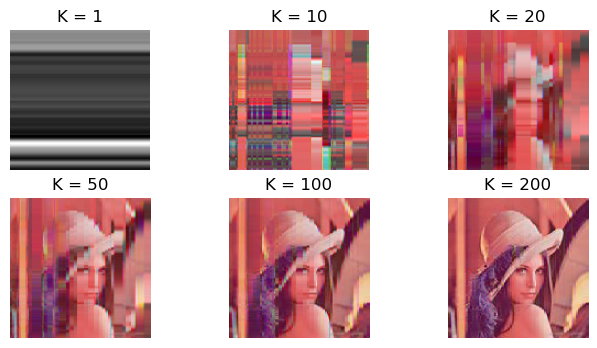

In [10]:
img_ch3 = mpimg.imread('input_image_ch3_128.jpg')

img_ch3_restored_1 = SoftKmeans_img_reconstruction(img_ch3, 1, epoch_num= 10000, beta = 0.3, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_10 = SoftKmeans_img_reconstruction(img_ch3, 10, epoch_num= 10000, beta = 0.8, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_20 = SoftKmeans_img_reconstruction(img_ch3, 20, epoch_num= 10000, beta = 0.8, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_50 = SoftKmeans_img_reconstruction(img_ch3, 50, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_100 = SoftKmeans_img_reconstruction(img_ch3, 100, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_200 = SoftKmeans_img_reconstruction(img_ch3, 200, epoch_num= 10000, beta = 1.0, init_type = 2, tol = 1e-20, random_state = 100, gray = False) # 0.00003 0.0022

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch3_restored_1)
plt.title('K = 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_ch3_restored_10)
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch3_restored_20)
plt.title('K = 20')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch3_restored_50)
plt.title('K = 50')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch3_restored_100)
plt.title('K = 100')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch3_restored_200)
plt.title('K = 200')
plt.axis('off')

plt.show()